In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
df=pd.read_excel('C:/Users/JunHau96/Downloads/dataset.xlsx', sheet_name='Order Data')
df2=pd.read_excel('C:/Users/JunHau96/Downloads/dataset.xlsx', sheet_name='Payments Data')

In [3]:
#joining two dataset into one
df=df.merge(df2,how='left',on='checkoutid')

In [4]:
#find the first five row of data
print (df.head()) 

      orderid     shopid     userid  checkoutid  total_price_x currency_x  \
0  6505222765  900457733  100223545  1044269436     147.168235        SGD   
1  6135926959  586311226  100223545  1211270092      33.169735        SGD   
2  5513066971  949679556  100223545  1676514901      24.112195        SGD   
3  5123701563  894942828  100223545  1211270092      75.913637        SGD   
4  7311653202  389950494  100223545  1880489412      14.455363        SGD   

   status created_time      payment_time_x         cancel_time  total_price_y  \
0       2   2019-11-14 2019-12-13 01:32:00                 NaT            NaN   
1       2   2019-12-13                 NaT                 NaT            NaN   
2       2   2019-12-31 2019-10-03 11:20:00                 NaT      24.112195   
3       6   2019-12-13 2019-10-10 16:28:00 2019-12-15 21:38:00            NaN   
4       6   2019-12-22                 NaT 2019-12-25 11:44:00      14.455363   

  currency_y payment_method      payment_time_y  


In [5]:
#find the data type for each column
print(df.dtypes)

orderid                    int64
shopid                     int64
userid                     int64
checkoutid                 int64
total_price_x            float64
currency_x                object
status                     int64
created_time      datetime64[ns]
payment_time_x    datetime64[ns]
cancel_time       datetime64[ns]
total_price_y            float64
currency_y                object
payment_method            object
payment_time_y    datetime64[ns]
dtype: object


In [6]:
#finding the dimensions of dataframe bwfore cleaning
print("dimensions of dataframe1 before cleaning:",df.shape)

dimensions of dataframe1 before cleaning: (7987, 14)


In [7]:
#rename the column to ensure consistency
df.rename(columns={'orderid':'Order_Id','shopid':'Shop_Id','userid':'User_Id','checkoutid':'Checkout_Id'},inplace=True)

In [8]:
df.describe()

,Order_Id,Shop_Id,User_Id,Checkout_Id,total_price_x,status,total_price_y
count,7.987000e+03,7.987000e+03,7.987000e+03,7.987000e+03,7987.000000,7987.000000,7879.000000
mean,5.414120e+09,5.451329e+08,5.507473e+08,1.487027e+09,75.497665,8.638663,75.599603
std,2.637263e+09,2.627234e+08,2.595093e+08,3.030778e+08,43.477037,3.882883,43.512430
min,1.170737e+08,1.002647e+08,1.002235e+08,1.230167e+08,1.003668,2.000000,1.003668
25%,3.120074e+09,3.148732e+08,3.280093e+08,1.235570e+09,37.683694,6.000000,37.705319
50%,5.380835e+09,5.427693e+08,5.465961e+08,1.491323e+09,75.511121,11.000000,75.831948
75%,7.703233e+09,7.719504e+08,7.735108e+08,1.742042e+09,113.178825,12.000000,113.323718
max,9.999839e+09,9.999270e+08,9.984749e+08,1.999521e+09,150.990501,13.000000,150.990501


In [9]:
#check non available value
nan_value=df.isna()
nan_columns=nan_value.any()
nan_columns

Order_Id          False
Shop_Id           False
User_Id           False
Checkout_Id       False
total_price_x     False
currency_x        False
status            False
created_time      False
payment_time_x     True
cancel_time        True
total_price_y      True
currency_y         True
payment_method     True
payment_time_y     True
dtype: bool

In [10]:
#find total non available value in each column
df.isnull().sum()

Order_Id             0
Shop_Id              0
User_Id              0
Checkout_Id          0
total_price_x        0
currency_x           0
status               0
created_time         0
payment_time_x    1690
cancel_time       5359
total_price_y      108
currency_y         108
payment_method     108
payment_time_y    1777
dtype: int64

In [11]:
#finding the order that sold by certain store
df.query('Shop_Id==111111111').head()

,Order_Id,Shop_Id,User_Id,Checkout_Id,total_price_x,currency_x,status,created_time,payment_time_x,cancel_time,total_price_y,currency_y,payment_method,payment_time_y
5,941194416,111111111,100223545,868753121,2.388681,SGD,8,2019-10-22,2019-11-29 05:17:00,2019-10-31,2.388681,SGD,Credit Card,2019-10-23 09:51:00
6,275459056,111111111,100223545,296034822,1.382727,SGD,8,2019-10-29,2019-12-11 16:02:00,2019-10-31,1.382727,SGD,Credit Card,2019-10-30 01:53:00
7,500491965,111111111,100223545,472950463,2.728841,SGD,8,2019-11-01,2019-11-29 02:19:00,2019-11-30,2.728841,SGD,Credit Card,2019-11-01 11:25:00
8,521741665,111111111,100223545,975734757,2.342173,SGD,8,2019-11-11,2019-10-04 23:39:00,2019-11-30,2.342173,SGD,ShopeePay,2019-11-12 08:28:00
10,776508360,111111111,100223545,657807529,3.958844,SGD,8,2019-11-18,2019-11-15 11:28:00,2019-11-30,3.958844,SGD,Credit Card,2019-11-18 21:51:00


In [12]:
#finding total value price sold
df.total_price_x.sum()

602999.853643947

In [13]:
#finding the top 10 seller
top_10_seller=df.groupby('Shop_Id')['total_price_x'].sum().sort_values(ascending=False).head(10)
print (top_10_seller)

Shop_Id
397966211    1676.815263
843003698     861.956103
964944806     624.796817
726396934     443.622905
604385234     423.660768
154396809     394.311655
882468634     378.087954
631672637     318.696609
788847405     314.062710
123030534     269.484271
Name: total_price_x, dtype: float64


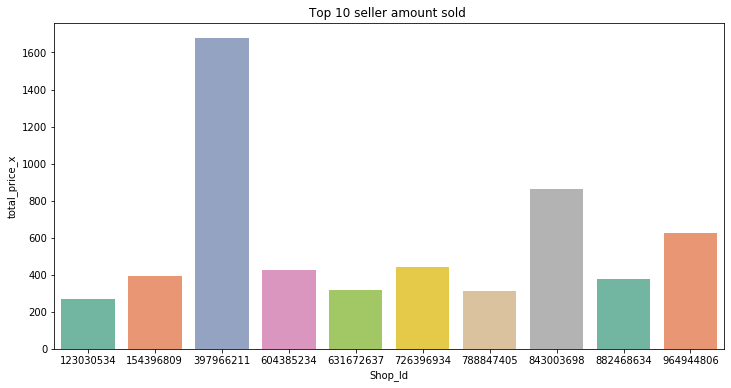

In [14]:
#Plot top 10 seller
plt.figure(figsize=(12,6))
plt.title('Top 10 seller amount sold ')
sns.barplot(x=top_10_seller.index,y=top_10_seller,palette='Set2')

In [15]:
#finding payment channel
payment_channel=df.payment_method.unique()
payment_channel

array([nan, 'Credit Card', 'ShopeePay', 'Bank Transfer'], dtype=object)

In [16]:
payment_channel_count=df.payment_method.value_counts()
payment_channel_count

Credit Card      6343
Bank Transfer    1149
ShopeePay         387
Name: payment_method, dtype: int64

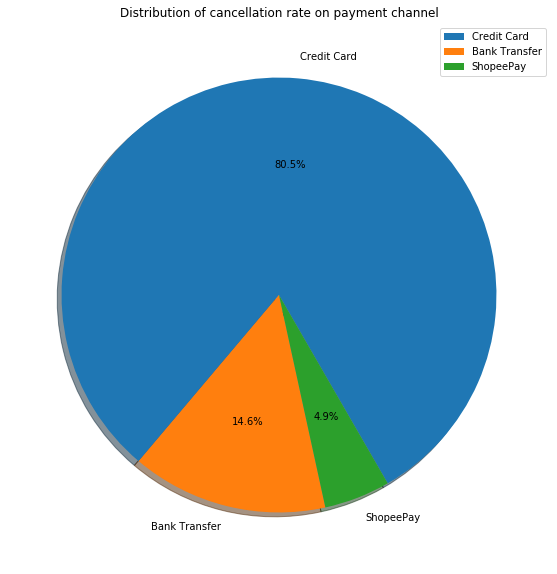

In [17]:
plt.figure(figsize=(10,10))
plt.title('Distribution of cancellation rate on payment channel')
plt.pie(payment_channel_count,labels=payment_channel_count.index,autopct='%1.1f%%',startangle=300,shadow=True)
plt.legend()

In [18]:
#finding the distribution of order cancellation in each month by each seller'
#k=0
#df['created_time']=pd.to_datetime(df.created_time)
#for k in range(len(df)):
  #try:
      #df['created_time']=pd.to_datetime(df.created_time,format='%m/%d/%Y')
  #except:
      #df['created_time']=pd.to_datetime(df.created_time,format='%d/%m/%Y')
#df['created_time']=df.created_time.dt.strftime('%d/%m/%Y')
#df['date'],df['month'],df['year']=df['created_time'].split('/')
df['month'] = pd.DatetimeIndex(df['created_time']).month
df_order_cancel=df[((df['status']==6) | (df['status']==7) |(df['status']==8) |(df['status']==9) | (df['status']==10))]
df_order_cancel.groupby(['Shop_Id','month'])['status'].count().reset_index(name='Order_Cancel').sort_values(ascending=False,by='Order_Cancel').head(10)

,Shop_Id,month,Order_Cancel
32,111111111,11,29
33,111111111,12,25
31,111111111,10,19
829,397966211,12,5
2074,843003698,10,3
2075,843003698,11,3
199,173105930,12,2
1892,771950408,12,2
2094,847634638,12,2
828,397966211,10,2


In [19]:
#finding total amount of order being cancel
cancel=[6,7,8,9,10]
index=df.apply(lambda x:True if x['status'] in cancel else False,axis=1) #get a boolean series which representing which row statisfy the criteria.
count_cancel=len(df[index==True].index)# find the total number of order been cancel
total_cancel=df.loc[(df['status']==6) | (df['status']==7) |(df['status']==8) |(df['status']==9) | (df['status']==10),'total_price_x'].sum() # finding the total value of cancelation
print('Number of order been cancelled are',count_cancel)
print('Total Value of order cancel is',total_cancel)

Number of order been cancelled are 2628
Total Value of order cancel is 194945.17158094875


In [20]:
#finding percentage of cancelled before and after payment
cancel_before_payment=6
cancel_after_payment=[7,8,9,10]
series_obj1=df.apply(lambda x:True if x['status'] == cancel_before_payment else False,axis=1)
series_obj2=df.apply(lambda x:True if x['status'] in cancel_after_payment else False,axis=1)
count_cancel_before=len(df[series_obj1==True].index) #count the number of order cancel before payment
count_cancel_after=len(df[series_obj2==True].index)  #count the number of order cancel after payment
print('Percentage of orders cancelled before payment',100*count_cancel_before/len(df),'%')
print('Percentage of orders cancelled after payment',100*count_cancel_after/len(df),'%')


Percentage of orders cancelled before payment 21.32214849129836 %
Percentage of orders cancelled after payment 11.581319644422186 %


In [21]:
#finding cancellation rate for each payment channel
result_df1= df.loc[(df['status']==6) | (df['status']==7) |(df['status']==8) |(df['status']==9) | (df['status']==10),:]
cancellation_rate=result_df1.groupby(['payment_method'])['total_price_x'].sum()
print('Cancellation rate for each payment channel are',cancellation_rate)

Cancellation rate for each payment channel are payment_method
Bank Transfer     28713.840615
Credit Card      152949.948277
ShopeePay          9938.240562
Name: total_price_x, dtype: float64


In [22]:
#finding whether do the buyer purchase from the same shop after cancellation
result_df2=df[~df.isin(result_df1)] 
User=result_df1['User_Id']
Shop=result_df1['Shop_Id']
order_reordered=len(result_df2.loc[(result_df2 ['User_Id'].isin(User)) & (result_df2 ['Shop_Id'].isin(Shop))])
print('Total order reorder from the same shop after cancellation are',order_reordered)

Total order reorder from the same shop after cancellation are 41


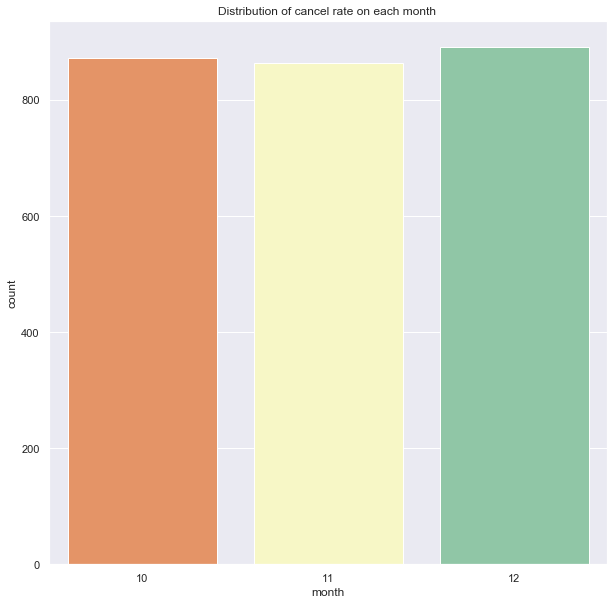

In [23]:
sns.set(style='darkgrid')
plt.figure(figsize=(10,10))
plt.title('Distribution of cancel rate on each month ')
sns.countplot(x='month',data=df_order_cancel,palette='Spectral')


In [24]:
#finding top 5 buyer over the months
df_order_sucess=df[~((df['status']==6) | (df['status']==7) |(df['status']==8) |(df['status']==9) | (df['status']==10))]
df_order_sucess.groupby('User_Id')['total_price_x'].sum().reset_index(name='total purchase amount').sort_values(ascending=False,by='total purchase amount').head(5)

,User_Id,total purchase amount
2162,477474790,1136.266957
683,224850852,1135.172927
2176,481323800,1124.340327
0,100223545,1097.074907
1330,335051703,1066.848723
